In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sympy import symbols, hessian, Function, N

In [ ]:
np.random.seed(1000)

In [ ]:
from sympy import symbols, hessian, Function, N
from timeit import default_timer as timer

In [ ]:
def xbar():

  x_bar= np.zeros(10).reshape(10,1) #Random vector of size 10×1
  for i in range(0,len(x_bar),2):
    np.random.seed(1000)
    x_bar[i]=np.random.uniform(-(i+2),-(i+1))
  for i in range(1,len(x_bar),2):
    np.random.seed(1000)
    x_bar[i]=np.random.uniform((i+1),(i+2))
  return np.array(x_bar)

In [ ]:
xbar()

array([[-1.34641041],
       [ 2.65358959],
       [-3.34641041],
       [ 4.65358959],
       [-5.34641041],
       [ 6.65358959],
       [-7.34641041],
       [ 8.65358959],
       [-9.34641041],
       [10.65358959]])

In [ ]:
np.random.seed(1000)
A = np.random.randn(1000, 10)
epsilon = np.random.randn(1000, 1)
x_bar = xbar()
A_x = np.matmul(A, x_bar)
y = A_x + epsilon

In [ ]:
#Defining function
def evalf(x):

  assert type(x) is np.ndarray
  fval = np.linalg.norm(np.matmul(A,x) - y)
  fval = 0.5 * (fval)**2
  return (fval)


In [ ]:
#Defining Gradient
def evalg(x):

 return np.array(np.matmul(A.T, np.matmul(A, x) - y))

In [ ]:
#Defining hessian
def evalh(x):

  assert type(x) is np.ndarray
  return np.matmul(A.T,A)


In [ ]:
def compute_D_k(x):
 D_k = np.linalg.pinv(evalh(x))
 return np.array(D_k)

In [ ]:
def compute_steplength_newton(x, gradf, direction, alpha_start, rho, gamma): #adding appropriate arguments to the function


  D_k = compute_D_k(x)
  alpha = alpha_start
  f = evalf(x)
  xnew = np.add(x, np.multiply(alpha, direction))
  fnew = evalf(xnew)

  while (fnew > f + gamma*alpha*np.dot(gradf.T,direction)).any():
    alpha = rho*alpha;
    xnew = np.add(x, np.multiply(alpha, direction))
    fnew = evalf(xnew)
  return alpha

In [ ]:
#line search type
BACKTRACKING_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH_SCALING = 2
EXACT_LINE_SEARCH = 3
CONSTANT_STEP_LENGTH = 4


In [ ]:
 #The Newton’s method with backtracking line search to find the minimizer
def find_minimizer_gdscaling_newton(start_x, tol, line_search_type,*args): #Adding appropriate arguments to the function
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SCALING):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0
  x_array = []

  while (np.linalg.norm(g_x) > tol):
    D_k = compute_D_k(x)
    direction = -np.matmul(D_k, g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH_SCALING:
      step_length = compute_steplength_newton(x, g_x, direction, alpha_start, rho, gamma)
    else:
      raise ValueError('Line search type unknown. Please check!')

    x_array.append(x)

    #implement the gradient descent steps here
    Hessian = evalh(x)
    x = np.add(x, np.multiply(step_length,direction)) #update x = x + step_length*direction
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

  print('iter:',k, ' f(x):', evalf(x), ' gradient norm:', np.linalg.norm(g_x))
  return x, evalf(x), k ,x_array

In [ ]:
 tol_1= 1e-4
 start_x_1 = np.full(10,0).reshape(10,1)
 start_time = timer()
 x_opt_1, funct_val_1 , k_1 ,x_array= find_minimizer_gdscaling_newton(start_x_1,tol_1,BACKTRACKING_LINE_SEARCH_SCALING, 0.99, 0.5, 0.5)
 end_time = timer()
 diff=end_time - start_time
 print('Time taken to compute is' ':',diff)
 print("Optimum function value:",funct_val_1)
 print("Function value at x_bar:",evalf(x_bar))
 print("Number of iterations:",k_1)



iter: 5  f(x): 504.5963652036182  gradient norm: 2.3807271360771784e-06
Time taken to compute is: 0.017952210999737872
Optimum function value: 504.5963652036182
Function value at x_bar: 508.51427768443995
Number of iterations: 5


**2.2**

iter: 5  

f(x): 504.5963652036182  

gradient norm: 2.3807271360771784e-06

Time taken to compute is: 0.013648108000040793

Optimum function value: 504.5963652036182

Function value at x_bar: 508.51427768443995

Number of iterations: 5

You can see function value at X_bar and X are very close. There is small differencr because of noise.

In [ ]:
import math

In [ ]:
 x_newton = [0]*len(x_array)
 f_newton = [0]*len(x_array)

 for i in range (len(x_newton)):
  x_newton[i]=math.log(np.linalg.norm(x_array[i] -  x_opt_1))
  f_newton[i]=math.log(np.abs(evalf(x_array[i]) - evalf( x_opt_1)))

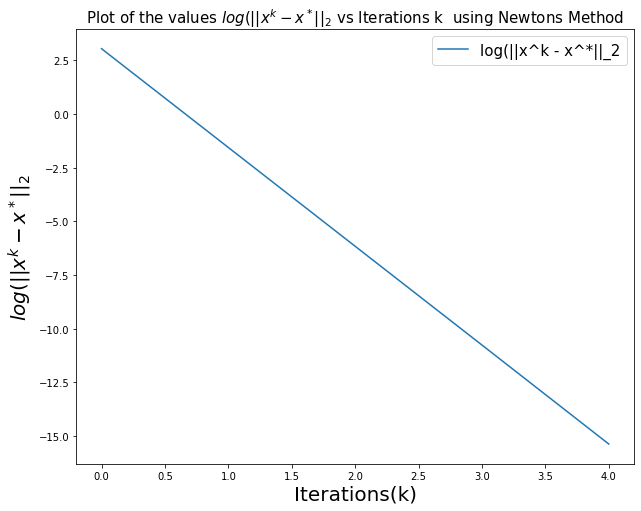

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x_newton)
plt.title('Plot of the values $log(||x^k - x^*||_2$ vs Iterations k  using Newtons Method',fontsize=15)
plt.xlabel('Iterations(k)',fontsize=20)
plt.ylabel('$log(||x^k - x^*||_2$',fontsize=20)
plt.legend(['log(||x^k - x^*||_2'],fontsize=15)
plt.show()

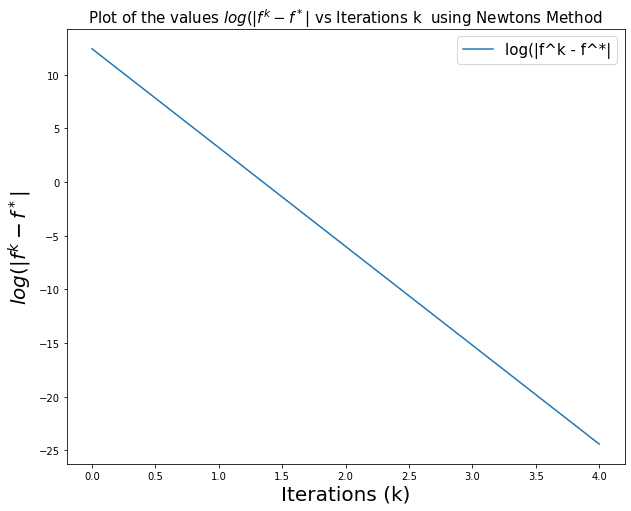

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(f_newton)
plt.title('Plot of the values $log(|f^k - f^*|$ vs Iterations k  using Newtons Method',fontsize=15)
plt.xlabel('Iterations (k)',fontsize=20)
plt.ylabel('$log(|f^k - f^*|$' ,fontsize=20)
plt.legend(['log(|f^k - f^*|'],fontsize=15)
plt.show()


**2.2**

Observations for plots

Convergence rates of both the plots is linear as clearly seen in the plots.

Both the iterates and function values sequences are Q-linear.

In [ ]:
def compute_B_k(s_k, y_k, B_k):

  assert type(s_k) is np.ndarray
  assert type(y_k) is np.ndarray
  assert type(B_k) is np.ndarray
  I=np.identity(10)
  mu = 1 / np.dot(np.squeeze(np.asarray(y_k)), np.squeeze(np.asarray(s_k)))
  P = np.outer(np.dot(mu, s_k), (y_k).T)
  Q = np.outer(np.dot(mu, y_k), (s_k).T)
  R = np.outer(np.dot(mu, s_k), (s_k).T)
  P_1 = np.subtract(I, P)
  Q_1 = np.subtract(I, Q)

  a = np.matmul(np.matmul(P_1, B_k), Q_1)
  b = np.add(a, R)

  return b

In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf,B_k, alpha_start, rho, gamma): #Adding appropriate arguments to the function
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  #assert type(gamma) is float and gamma>=0.
  g_x = evalg(x)

  P_k = (-1)*np.matmul(B_k, gradf)
  alpha = alpha_start
  f = evalf(x)
  xnew = x + np.multiply(alpha, P_k)
  fnew = evalf(xnew)

  while (fnew > f + gamma*alpha*np.matmul(gradf.T, P_k)):
    alpha = rho*alpha;
    xnew = np.add(x, np.multiply(alpha, P_k))
    fnew = evalf(xnew)
  return alpha

In [ ]:
def find_minimizer_gdscaling(start_x, tol, line_search_type, *args): #Adding appropriate arguments to the function
  assert type(start_x) is np.ndarray
  assert type(tol) is float and tol>=0

  x = start_x
  g_x = evalg(x)
  k = 0
  B_k = np.identity(10)

   #initialization for backtracking line search
  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  x_array_2 = []

  while (np.linalg.norm(g_x) > tol):
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x,B_k, alpha_start, rho, gamma)
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 1.
    else:
      raise ValueError('Line search type unknown. Please check!')

    x_array_2.append(x)

    x_old = x
    x = x_old - step_length*np.matmul(B_k, g_x)
    s_k =x-x_old
    y_k=np.subtract(evalg(x),evalg(x_old))
    B_k = compute_B_k(s_k,y_k,B_k)

    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point


  print('iter:',k, ' f(x):', evalf(x), ' gradient norm:', np.linalg.norm(g_x))
  return x, evalf(x), k,x_array_2

**1.3**

In [ ]:
 my_tol_2= 1e-4
 my_start_x_2 = np.full(10,0).reshape(10,1)
 start_time = timer()
 x_opt_2, funct_val_2 , k_2 ,x_array_2= find_minimizer_gdscaling(my_start_x_2,my_tol_2,BACKTRACKING_LINE_SEARCH, 0.99, 0.5, 0.5)
 end_time = timer()
 diff=end_time - start_time
 print('Time taken to compute' ':',diff)
 print("Optimum function value:",funct_val_2)
 print("Function value at x_bar:",evalf(x_bar))
 print("Number of iterations:",k_2)

iter: 16  f(x): 504.5963652036207  gradient norm: 7.16625128475164e-05
Time taken to compute: 0.013252576000013505
Optimum function value: 504.5963652036207
Function value at x_bar: 508.51427768443995
Number of iterations: 16


iter: 16
 f(x): 504.5963652036207

   gradient norm: 7.16625128475164e-05

Time taken to compute: 0.015574706000052174

Optimum function value: 504.5963652036207

Function value at x_bar: 508.51427768443995

Number of iterations: 16

Both valuse of function at X_bar and X are close.

There is small difference between these two is because of noise

In [ ]:
 x_BFGS = [0]*len(x_array_2)
 f_BFGS = [0]*len(x_array_2)

 for i in range (len(x_BFGS)):
  x_BFGS[i]=math.log(np.linalg.norm(x_array_2[i] -  x_opt_2))
  f_BFGS[i]=math.log(np.abs(evalf(x_array_2[i]) - evalf( x_opt_2)))

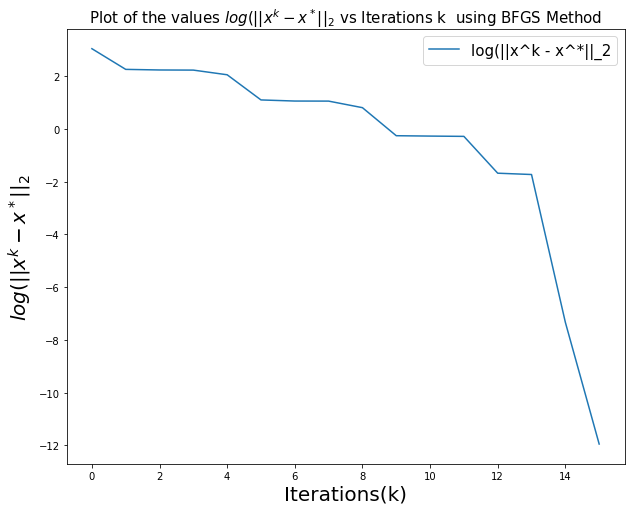

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x_BFGS)
plt.title('Plot of the values $log(||x^k - x^*||_2$ vs Iterations k  using BFGS Method',fontsize=15)
plt.xlabel('Iterations(k)',fontsize=20)
plt.ylabel('$log(||x^k - x^*||_2$',fontsize=20)
plt.legend(['log(||x^k - x^*||_2'],fontsize=15)
plt.show()

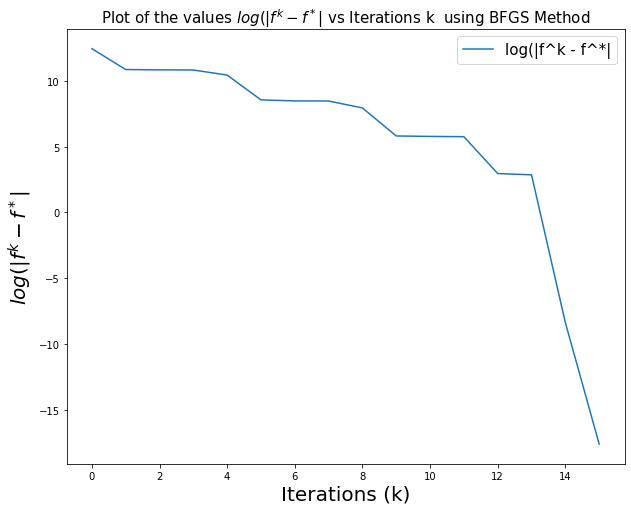

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(f_BFGS)
plt.title('Plot of the values $log(|f^k - f^*|$ vs Iterations k  using BFGS Method',fontsize=15)
plt.xlabel('Iterations (k)',fontsize=20)
plt.ylabel('$log(|f^k - f^*|$' ,fontsize=20)
plt.legend(['log(|f^k - f^*|'] ,fontsize=15)
plt.show()

**1.3**


Observations

Here both the sequences of iterates and function values show similar convergence.

From graphs we can say that sequences are Q-quadratic.


**1.4**

**BFGS**

iter: 16
 f(x): 504.5963652036207

   gradient norm: 7.16625128475164e-05

Time taken to compute: 0.015574706000052174

Optimum function value: 504.5963652036207

Function value at x_bar: 508.51427768443995

Number of iterations: 16

**Newton**

iter: 5  

f(x): 504.5963652036182  

gradient norm: 2.3807271360771784e-06

Time taken to compute is: 0.013648108000040793

Optimum function value: 504.5963652036182

Function value at x_bar: 508.51427768443995

Number of iterations: 5

Its clear that both methods give almost same function.

BFGS takkes more iterations to converge

Time in BFGS is more than newton